# Feed Forward Neural Networks

In [ ]:
# jupyter notebook

In [ ]:
### 210701~210711, 210821~210831 검증기간(총 22일간)

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense

import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model

# Train

In [2]:
cd C:\weather\data\train

C:\weather\data\train


In [3]:
forders_tr = os.listdir()
forders_tr

['table_202001.csv',
 'table_202002.csv',
 'table_202003.csv',
 'table_202004.csv',
 'table_202005.csv',
 'table_202006.csv',
 'table_202007.csv',
 'table_202008.csv',
 'table_202009.csv',
 'table_202010.csv',
 'table_202011.csv',
 'table_202012.csv',
 'table_202101.csv',
 'table_202102.csv',
 'table_202103.csv',
 'table_202104.csv',
 'table_202105.csv',
 'table_202106.csv']

In [4]:
# 새로운 데이터 프레임 생성
train = pd.DataFrame()

for files in forders_tr:
    df= pd.read_csv(files)
    train = pd.concat([train, df])

In [5]:
train

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,Band1,Band2,Band3,Band4,Band5,...,Year,Month,Day,Hour,Minute,mean_6_23,mean_34_37,mean_38_39,mean_40_42,mean_43_44
0,202001010000,90,128.56473,38.25085,-2.6,0.00000,0.00000,-0.00060,-0.00030,-0.0003,...,2020,1,1,0,0,0.422121,0.000000,0.000000,0.000000,0.868476
1,202001010000,95,127.30420,38.14787,-2.6,-0.00057,-0.00057,0.00030,-0.00060,-0.0003,...,2020,1,1,0,0,-0.391234,0.000000,0.000000,0.000000,1.114533
2,202001010000,98,127.06070,37.90188,-3.1,0.00000,0.00000,0.00030,0.00060,-0.0003,...,2020,1,1,0,0,-0.355405,0.000000,0.000000,0.000000,1.315872
3,202001010000,99,126.76648,37.88589,-3.4,-0.00057,-0.00057,-0.00030,0.00015,0.0000,...,2020,1,1,0,0,-0.332510,0.000000,0.000000,0.000000,1.666385
4,202001010000,101,127.73570,37.90262,-3.6,-0.00057,0.00000,0.00030,0.00030,0.0000,...,2020,1,1,0,0,-0.188191,-1.022277,-0.499305,0.114355,1.402172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447705,202106302350,973,126.94961,35.02330,23.6,-0.00057,-0.00057,-0.00179,-0.00060,-0.0003,...,2021,6,30,23,50,0.000385,1.107697,1.107273,0.000000,0.209894
447706,202106302350,974,128.15605,35.24435,20.7,0.00000,-0.00057,0.00089,0.00015,0.0000,...,2021,6,30,23,50,0.071010,1.472452,1.488681,0.000000,0.000000
447707,202106302350,977,127.46688,36.72455,23.9,-0.00057,-0.00057,-0.00060,0.00015,0.0000,...,2021,6,30,23,50,-0.144802,1.049685,1.210674,0.000000,0.000000
447708,202106302350,978,127.77626,37.95461,23.2,-0.00057,0.00000,0.00030,-0.00075,-0.0003,...,2021,6,30,23,50,-0.365471,0.726721,0.740235,0.000000,0.000000


# Validation

In [6]:
cd C:\weather\data\val

C:\weather\data\val


In [7]:
forders_val = os.listdir()
forders_val

['table_202109.csv',
 'table_202110.csv',
 'table_202111.csv',
 'table_202112.csv']

In [8]:
# 새로운 데이터 프레임 생성
val = pd.DataFrame()

for files in forders_val:
    df= pd.read_csv(files)
    val = pd.concat([val, df])

In [9]:
val

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,Band1,Band2,Band3,Band4,Band5,...,Year,Month,Day,Hour,Minute,mean_6_23,mean_34_37,mean_38_39,mean_40_42,mean_43_44
0,202109010000,90,128.56473,38.25085,17.9,0.00170,0.00171,0.00238,0.00195,0.00181,...,2021,9,1,0,0,-0.733944,0.000000,0.000000,0.000000,0.508451
1,202109010000,93,127.75443,37.94738,19.0,0.00170,0.00171,0.00149,0.00180,0.00121,...,2021,9,1,0,0,-0.696051,-0.914975,0.447435,0.341129,-0.179931
2,202109010000,95,127.30420,38.14787,17.6,0.00170,0.00228,0.00179,0.00195,0.00151,...,2021,9,1,0,0,-0.279810,0.000000,0.000000,0.000000,-0.365214
3,202109010000,98,127.06070,37.90188,19.3,0.00227,0.00228,0.00238,0.00374,0.00181,...,2021,9,1,0,0,-0.195837,0.000000,0.000000,0.000000,-0.290579
4,202109010000,99,126.76648,37.88589,19.6,0.00227,0.00228,0.00268,0.00239,0.00151,...,2021,9,1,0,0,-0.370219,0.000000,0.000000,0.000000,0.015434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432625,202112312350,702,126.99435,35.94504,-3.2,-0.00057,-0.00057,-0.00030,-0.00045,-0.00030,...,2021,12,31,23,50,-0.787369,-1.417396,-1.534663,0.000000,0.000000
432626,202112312350,972,128.68340,36.54983,-4.8,-0.00057,0.00057,0.00089,-0.00015,0.00000,...,2021,12,31,23,50,-0.672741,-1.492066,-1.894582,0.000000,1.185870
432627,202112312350,973,126.94961,35.02330,-2.4,0.00000,-0.00057,-0.00179,0.00015,-0.00030,...,2021,12,31,23,50,-0.684352,-0.847900,-0.716603,0.000000,1.525860
432628,202112312350,974,128.15605,35.24435,-1.8,-0.00057,-0.00057,0.00060,-0.00015,0.00000,...,2021,12,31,23,50,-2.065335,-1.364155,-0.756098,0.000000,0.000000


# Test

In [10]:
cd C:\weather\data\test

C:\weather\data\test


In [11]:
forders_te = os.listdir()
forders_te

['table_202107_1.csv', 'table_202108_2.csv']

In [12]:
### 210701~210711, 210821~210831 검증기간(총 22일간)

# 새로운 데이터 프레임 생성
test = pd.DataFrame()

for files in forders_te:
    df= pd.read_csv(files)
    test = pd.concat([test, df])

In [13]:
test

,YearMonthDayHourMinute,STN,Lon,Lat,Band1,Band2,Band3,Band4,Band5,Band6,...,Year,Month,Day,Hour,Minute,mean_6_23,mean_34_37,mean_38_39,mean_40_42,mean_43_44
0,202107000000,90,128.56473,38.25085,-0.00057,-0.00057,-0.00149,-0.00045,-0.00060,0.00000,...,2021,7,0,0,0,-0.137869,0.000000,0.000000,0.000000,0.503333
1,202107000000,93,127.75443,37.94738,-0.00057,-0.00057,-0.00119,0.00000,0.00000,-0.00065,...,2021,7,0,0,0,0.115111,-0.141101,0.027567,-0.354792,0.074239
2,202107000000,95,127.30420,38.14787,-0.00057,-0.00057,-0.00060,0.00015,0.00000,-0.00065,...,2021,7,0,0,0,-0.072823,0.000000,0.000000,0.000000,-0.073873
3,202107000000,98,127.06070,37.90188,-0.00057,-0.00057,0.00030,-0.00015,-0.00030,-0.00065,...,2021,7,0,0,0,0.138902,0.000000,0.000000,0.000000,0.065445
4,202107000000,99,126.76648,37.88589,-0.00057,0.00000,-0.00060,-0.00105,0.00000,-0.00065,...,2021,7,0,0,0,0.177468,0.000000,0.000000,0.000000,0.444882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27087,202108000000,973,126.94961,35.02330,0.00000,0.00000,0.00030,0.00015,0.00121,0.00000,...,2021,8,0,0,0,-0.207862,1.366354,0.637043,0.000000,0.664962
27088,202108000000,974,128.15605,35.24435,0.00000,0.00057,0.00000,0.00015,0.00000,0.00000,...,2021,8,0,0,0,-0.559507,1.766315,1.253310,0.000000,0.000000
27089,202108000000,977,127.46688,36.72455,0.00000,0.00057,-0.00179,0.00030,0.00000,0.00000,...,2021,8,0,0,0,-0.449989,-0.705848,-0.467874,0.000000,0.000000
27090,202108000000,978,127.77626,37.95461,0.00000,0.00000,0.00089,0.00015,-0.00030,0.00000,...,2021,8,0,0,0,-0.374500,-1.392848,-0.768451,0.000000,0.000000


# Submission

In [14]:
cd C:\weather\data

C:\weather\data


In [15]:
# Set Pandas options to display more columns
# pd.options.display.max_columns=50
submission=pd.read_csv('1-2_검증데이터셋.csv', encoding='utf-8')
submission

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,NaN,NaN
1,202107010030,93,NaN,NaN
2,202107010030,95,NaN,NaN
3,202107010030,98,NaN,NaN
4,202107010030,99,NaN,NaN
...,...,...,...,...
54498,202108312330,973,NaN,NaN
54499,202108312330,974,NaN,NaN
54500,202108312330,977,NaN,NaN
54501,202108312330,978,NaN,NaN


# 모델 Train

In [25]:
train

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,Band1,Band2,Band3,Band4,Band5,...,Year,Month,Day,Hour,Minute,mean_6_23,mean_34_37,mean_38_39,mean_40_42,mean_43_44
0,202001010000,90,128.56473,38.25085,-2.6,0.00000,0.00000,-0.00060,-0.00030,-0.0003,...,2020,1,1,0,0,0.422121,0.000000,0.000000,0.000000,0.868476
1,202001010000,95,127.30420,38.14787,-2.6,-0.00057,-0.00057,0.00030,-0.00060,-0.0003,...,2020,1,1,0,0,-0.391234,0.000000,0.000000,0.000000,1.114533
2,202001010000,98,127.06070,37.90188,-3.1,0.00000,0.00000,0.00030,0.00060,-0.0003,...,2020,1,1,0,0,-0.355405,0.000000,0.000000,0.000000,1.315872
3,202001010000,99,126.76648,37.88589,-3.4,-0.00057,-0.00057,-0.00030,0.00015,0.0000,...,2020,1,1,0,0,-0.332510,0.000000,0.000000,0.000000,1.666385
4,202001010000,101,127.73570,37.90262,-3.6,-0.00057,0.00000,0.00030,0.00030,0.0000,...,2020,1,1,0,0,-0.188191,-1.022277,-0.499305,0.114355,1.402172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447705,202106302350,973,126.94961,35.02330,23.6,-0.00057,-0.00057,-0.00179,-0.00060,-0.0003,...,2021,6,30,23,50,0.000385,1.107697,1.107273,0.000000,0.209894
447706,202106302350,974,128.15605,35.24435,20.7,0.00000,-0.00057,0.00089,0.00015,0.0000,...,2021,6,30,23,50,0.071010,1.472452,1.488681,0.000000,0.000000
447707,202106302350,977,127.46688,36.72455,23.9,-0.00057,-0.00057,-0.00060,0.00015,0.0000,...,2021,6,30,23,50,-0.144802,1.049685,1.210674,0.000000,0.000000
447708,202106302350,978,127.77626,37.95461,23.2,-0.00057,0.00000,0.00030,-0.00075,-0.0003,...,2021,6,30,23,50,-0.365471,0.726721,0.740235,0.000000,0.000000


In [16]:
##### Step 1 - Select data for modeling(training data & validation data
X_train = train.drop(['Band1','Band2','Band3','Band4','Band5','Band6','Band7','Band8','Band9','Band10','Band11','Band12', \
            'Band13','Band14','Band15','Band16','30daysBand3','30daysBand13', \
           'insitu-TED0.05','insitu-TED0.1','insitu-TED0.2','insitu-TED0.3','insitu-TED0.5','insitu-TED1.0','insitu-TED1.5','insitu-TED3.0', \
           'insitu-TED5.0','insitu-PA','insitu-PS','Year','Month','Day','Hour','Minute','YearMonthDayHourMinute', \
           'STN','Lon','Lat','isitu-LST','insitu-TA'], axis=1)
X_test = val.drop(['Band1','Band2','Band3','Band4','Band5','Band6','Band7','Band8','Band9','Band10','Band11','Band12', \
            'Band13','Band14','Band15','Band16','30daysBand3','30daysBand13', \
           'insitu-TED0.05','insitu-TED0.1','insitu-TED0.2','insitu-TED0.3','insitu-TED0.5','insitu-TED1.0','insitu-TED1.5','insitu-TED3.0', \
           'insitu-TED5.0','insitu-PA','insitu-PS','Year','Month','Day','Hour','Minute','YearMonthDayHourMinute', \
           'STN','Lon','Lat','isitu-LST','insitu-TA'], axis=1)

y_train=train[['isitu-LST', 'insitu-TA']].values
y_test=val[['isitu-LST', 'insitu-TA']].values

X_train

,GK2A-LST,SolarZA,SateZA,ESR,Height,LandType,insitu-HM,insitu-TD,insitu-TG,mean_6_23,mean_34_37,mean_38_39,mean_40_42,mean_43_44
0,-999.00000,162.63634,44.52481,-9.38141,17.53,2,30.3,-17.7,-4.2,0.422121,0.000000,0.000000,0.000000,0.868476
1,-999.00000,162.17793,44.41427,-9.36082,155.48,2,64.1,-14.5,-7.9,-0.391234,0.000000,0.000000,0.000000,1.114533
2,-999.00000,162.27711,44.13104,-9.36664,115.62,2,58.4,-14.7,-7.4,-0.355405,0.000000,0.000000,0.000000,1.315872
3,-999.00000,162.14729,44.12316,-9.36060,30.59,2,52.8,-15.4,-6.5,-0.332510,0.000000,0.000000,0.000000,1.666385
4,-9.38000,162.57755,44.12761,-9.38050,75.82,3,66.0,-14.3,-14.1,-0.188191,-1.022277,-0.499305,0.114355,1.402172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447705,19.20999,120.35766,40.87855,-4.18556,39.64,2,96.9,20.0,19.4,0.000385,1.107697,1.107273,0.000000,0.209894
447706,20.35001,120.38888,41.10588,-4.21799,16.78,2,93.5,18.7,-999.0,0.071010,1.472452,1.488681,0.000000,0.000000
447707,14.64999,118.81387,42.79873,-3.99159,40.35,2,98.3,21.6,21.9,-0.144802,1.049685,1.210674,0.000000,0.000000
447708,-999.00000,117.67587,44.18884,-3.84460,140.37,2,95.9,20.1,19.2,-0.365471,0.726721,0.740235,0.000000,0.000000


In [17]:
X_test

,GK2A-LST,SolarZA,SateZA,ESR,Height,LandType,insitu-HM,insitu-TD,insitu-TG,mean_6_23,mean_34_37,mean_38_39,mean_40_42,mean_43_44
0,-999.00000,132.65269,44.52481,-6.38871,17.53,2,97.3,16.9,17.8,-0.733944,0.000000,0.000000,0.000000,0.508451
1,-999.00000,132.82147,44.16866,-6.41119,95.78,3,98.5,17.5,17.5,-0.696051,-0.914975,0.447435,0.341129,-0.179931
2,-999.00000,132.53152,44.41427,-6.37791,155.48,2,100.0,17.1,17.1,-0.279810,0.000000,0.000000,0.000000,-0.365214
3,13.45001,132.73465,44.13104,-6.40288,115.62,2,99.9,17.7,18.1,-0.195837,0.000000,0.000000,0.000000,-0.290579
4,-999.00000,132.69038,44.12316,-6.39848,30.59,2,99.8,17.7,18.0,-0.370219,0.000000,0.000000,0.000000,0.015434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432625,-9.10999,162.38597,41.92041,-8.86355,15.12,2,82.1,-10.7,-9.7,-0.787369,-1.417396,-1.534663,0.000000,0.000000
432626,-9.66000,162.89288,42.59904,-8.93360,88.62,2,40.1,-17.3,-8.5,-0.672741,-1.492066,-1.894582,0.000000,1.185870
432627,-7.60999,162.98303,40.87855,-8.88743,39.64,2,53.4,-11.7,-4.8,-0.684352,-0.847900,-0.716603,0.000000,1.525860
432628,-999.00000,163.56012,41.10588,-8.94638,16.78,2,36.2,-15.7,-999.0,-2.065335,-1.364155,-0.756098,0.000000,0.000000


In [18]:
##### Step 2 - Create training and testing samples
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


##### Step 3 - Specify the structure of a neural network
model2 = Sequential(name="Model-with-Two-Inputs")
model2.add(Input(shape=(len(X_train.columns),), name='Input-Layer'))
model2.add(Dense(len(X_train.columns), activation='relu', name='Hidden-Layer1'))
model2.add(Dense(len(X_train.columns), activation='relu', name='Hidden-Layer2'))
model2.add(Dense(len(X_train.columns), activation='relu', name='Hidden-Layer3'))
model2.add(Dense(2, activation='relu', name='Output-Layer'))


##### Step 4 - Compile the keras model
model2.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'],
              loss_weights=None,
              weighted_metrics=None,
              run_eagerly=None, 
              steps_per_execution=None 
             )

model2.summary()

Model: "Model-with-Two-Inputs"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer1 (Dense)       (None, 14)                210       
                                                                 
 Hidden-Layer2 (Dense)       (None, 14)                210       
                                                                 
 Hidden-Layer3 (Dense)       (None, 14)                210       
                                                                 
 Output-Layer (Dense)        (None, 2)                 30        
                                                                 
Total params: 660
Trainable params: 660
Non-trainable params: 0
_________________________________________________________________


In [19]:
cd C:\weather

C:\weather


In [20]:
os.getcwd()

'C:\\weather'

In [21]:
##### Step 5 - Fit keras model on the dataset

# Set Directory
save_dir = os.path.join(os.getcwd(),'save')

model_name = 'ffnn_v2.{epoch:02d}.h5' 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)


checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_mse',
                             verbose=1,
                             save_best_only=True)

callbacks = checkpoint                  

In [22]:
hist = model2.fit(X_train.to_numpy(),       # input data
          y_train,                 # target data
          batch_size=32,    
          epochs=100,         # 늘려야 할 부분     
          validation_data=(X_test, y_test),
          shuffle=True,
          callbacks=callbacks)

Epoch 1/100
256292/256334 [============================>.] - ETA: 0s - loss: 14.2260 - mse: 14.2260
Epoch 1: val_mse improved from inf to 3.38234, saving model to C:\weather\save\ffnn_v2.01.h5
256334/256334 [==============================] - 146s 567us/step - loss: 14.2244 - mse: 14.2244 - val_loss: 3.3823 - val_mse: 3.3823
Epoch 2/100
256293/256334 [============================>.] - ETA: 0s - loss: 4.3877 - mse: 4.3877
Epoch 2: val_mse did not improve from 3.38234
256334/256334 [==============================] - 147s 573us/step - loss: 4.3878 - mse: 4.3878 - val_loss: 3.4990 - val_mse: 3.4990
Epoch 3/100
256244/256334 [============================>.] - ETA: 0s - loss: 4.2247 - mse: 4.2247
Epoch 3: val_mse improved from 3.38234 to 3.19699, saving model to C:\weather\save\ffnn_v2.03.h5
256334/256334 [==============================] - 147s 575us/step - loss: 4.2247 - mse: 4.2247 - val_loss: 3.1970 - val_mse: 3.1970
Epoch 4/100
256297/256334 [============================>.] - ETA: 0s - lo

Epoch 29/100
256242/256334 [============================>.] - ETA: 0s - loss: 3.9742 - mse: 3.9742
Epoch 29: val_mse did not improve from 2.89083
256334/256334 [==============================] - 138s 538us/step - loss: 3.9741 - mse: 3.9741 - val_loss: 2.9406 - val_mse: 2.9406
Epoch 30/100
256261/256334 [============================>.] - ETA: 0s - loss: 3.9695 - mse: 3.9695
Epoch 30: val_mse did not improve from 2.89083
256334/256334 [==============================] - 137s 534us/step - loss: 3.9695 - mse: 3.9695 - val_loss: 2.9255 - val_mse: 2.9255
Epoch 31/100
256250/256334 [============================>.] - ETA: 0s - loss: 3.9687 - mse: 3.9687
Epoch 31: val_mse did not improve from 2.89083
256334/256334 [==============================] - 141s 550us/step - loss: 3.9688 - mse: 3.9688 - val_loss: 3.1303 - val_mse: 3.1303
Epoch 32/100
256274/256334 [============================>.] - ETA: 0s - loss: 3.9813 - mse: 3.9813
Epoch 32: val_mse did not improve from 2.89083
256334/256334 [========

256248/256334 [============================>.] - ETA: 0s - loss: 4.0092 - mse: 4.0092
Epoch 58: val_mse did not improve from 2.81329
256334/256334 [==============================] - 139s 541us/step - loss: 4.0091 - mse: 4.0091 - val_loss: 3.1950 - val_mse: 3.1950
Epoch 59/100
256334/256334 [==============================] - ETA: 0s - loss: 3.9855 - mse: 3.9855
Epoch 59: val_mse did not improve from 2.81329
256334/256334 [==============================] - 141s 551us/step - loss: 3.9855 - mse: 3.9855 - val_loss: 2.9365 - val_mse: 2.9365
Epoch 60/100
256302/256334 [============================>.] - ETA: 0s - loss: 3.9746 - mse: 3.9746
Epoch 60: val_mse did not improve from 2.81329
256334/256334 [==============================] - 142s 554us/step - loss: 3.9746 - mse: 3.9746 - val_loss: 2.9267 - val_mse: 2.9267
Epoch 61/100
256239/256334 [============================>.] - ETA: 0s - loss: 3.9725 - mse: 3.9725
Epoch 61: val_mse did not improve from 2.81329
256334/256334 [=====================

Epoch 88/100
256264/256334 [============================>.] - ETA: 0s - loss: 3.9415 - mse: 3.9415
Epoch 88: val_mse did not improve from 2.81329
256334/256334 [==============================] - 137s 533us/step - loss: 3.9415 - mse: 3.9415 - val_loss: 3.5223 - val_mse: 3.5223
Epoch 89/100
256322/256334 [============================>.] - ETA: 0s - loss: 3.9401 - mse: 3.9401
Epoch 89: val_mse did not improve from 2.81329
256334/256334 [==============================] - 136s 530us/step - loss: 3.9402 - mse: 3.9402 - val_loss: 2.8820 - val_mse: 2.8820
Epoch 90/100
256239/256334 [============================>.] - ETA: 0s - loss: 3.9409 - mse: 3.9409
Epoch 90: val_mse did not improve from 2.81329
256334/256334 [==============================] - 136s 530us/step - loss: 3.9408 - mse: 3.9408 - val_loss: 2.9087 - val_mse: 2.9087
Epoch 91/100
256303/256334 [============================>.] - ETA: 0s - loss: 3.9394 - mse: 3.9394
Epoch 91: val_mse did not improve from 2.81329
256334/256334 [========

In [23]:
model2.save('ffnn_v2.h5')

In [26]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(hist.history) 

# or save to csv: 
hist_csv_file = 'ffnn_v2_history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [27]:
hh = pd.read_csv('ffnn_v2_history.csv')
hh

,Unnamed: 0,loss,mse,val_loss,val_mse
0,0,14.224367,14.224367,3.382335,3.382335
1,1,4.387770,4.387770,3.499034,3.499034
2,2,4.224678,4.224678,3.196992,3.196992
3,3,4.151183,4.151183,3.140743,3.140743
4,4,4.118145,4.118145,3.096875,3.096875
...,...,...,...,...,...
95,95,3.947212,3.947212,3.144511,3.144511
96,96,3.938669,3.938669,3.055780,3.055780
97,97,3.940818,3.940818,3.112876,3.112876
98,98,3.944611,3.944611,2.893771,2.893771


# 시각화

Loss

In [28]:
def Plot_history(history):
  plt.subplot(211)
  plt.plot(hist.history['loss'], color = 'b', label = 'train')
  plt.plot(hist.history['val_loss'], color = 'g', label = 'test')
  plt.ylabel('Loss')
  plt.legend()

#   plt.subplot(212)
#   plt.plot(hist.history['mse'], color = 'r', label = 'train')
#   plt.plot(hist.history['val_mse'], color = 'black', label = 'test')
#   plt.xlabel('Epoch')
#   plt.ylabel('mse')
#   plt.legend()
#   plt.show()  

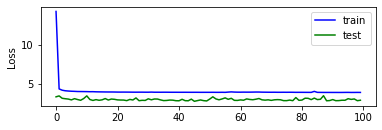

In [29]:
Plot_history(hist)

In [30]:
scores = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test mse:', scores[1])

Test loss: 2.949962854385376
Test mse: 2.949962854385376


LST,TA

In [31]:
# LST,TA 얼마나 잘 맞췄는지 겹쳐 그래프도 그리기

In [32]:
pred_te = model2.predict(X_test)
pred_te

55630/55630 [==============================] - 19s 336us/step


array([[18.406624  , 17.289558  ],
       [17.991695  , 17.655924  ],
       [17.782906  , 16.949745  ],
       ...,
       [ 0.        ,  0.        ],
       [ 0.        ,  0.32886124],
       [ 2.8116007 ,  3.3386846 ]], dtype=float32)

In [33]:
lst_pr = []
ta_pr = []
for i in range(len(pred_te)):
    lst_pr.append(pred_te[i][0])
    ta_pr.append(pred_te[i][1])

In [34]:
lst_re = []
ta_re = []
for i in range(len(y_test)):
    lst_re.append(y_test[i][0])
    ta_re.append(y_test[i][1])

In [35]:
def value_compare():
  plt.subplot(211)
  plt.plot(lst_pr[500:550], color = 'b', label = 'pred')
  plt.plot(lst_re[500:550], color = 'g', label = 'real')
  plt.ylabel('LST')
  plt.legend()

  plt.subplot(212)
  plt.plot(ta_pr[700:750], color = 'r', label = 'pred')
  plt.plot(ta_re[700:750], color = 'black', label = 'real')
  plt.ylabel('TA')
  plt.legend()
  plt.show()  

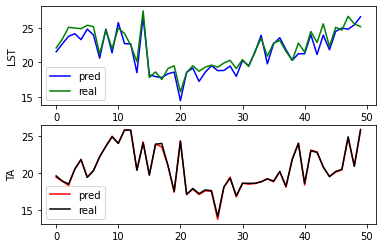

In [36]:
value_compare()

# 예측 값 파일에 저장

In [38]:
test_ = test.drop(['Band1','Band2','Band3','Band4','Band5','Band6','Band7','Band8','Band9','Band10','Band11','Band12', \
            'Band13','Band14','Band15','Band16','30daysBand3','30daysBand13', \
           'insitu-TED0.05','insitu-TED0.1','insitu-TED0.2','insitu-TED0.3','insitu-TED0.5','insitu-TED1.0','insitu-TED1.5','insitu-TED3.0', \
           'insitu-TED5.0','insitu-PA','insitu-PS','Year','Month','Day','Hour','Minute','YearMonthDayHourMinute', \
           'STN','Lon','Lat'], axis=1)

In [39]:
pred = model2.predict(test_)
pred

1704/1704 [==============================] - 1s 354us/step


array([[21.15091 , 20.950663],
       [21.39944 , 20.732632],
       [19.682354, 18.964403],
       ...,
       [21.399189, 20.217953],
       [17.992367, 17.31112 ],
       [26.326286, 24.25827 ]], dtype=float32)

In [40]:
submission1 = submission.copy()
submission1

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,NaN,NaN
1,202107010030,93,NaN,NaN
2,202107010030,95,NaN,NaN
3,202107010030,98,NaN,NaN
4,202107010030,99,NaN,NaN
...,...,...,...,...
54498,202108312330,973,NaN,NaN
54499,202108312330,974,NaN,NaN
54500,202108312330,977,NaN,NaN
54501,202108312330,978,NaN,NaN


In [41]:
submission1[['isitu-LST', 'insitu-TA']] = pred
submission1

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,21.150909,20.950663
1,202107010030,93,21.399441,20.732632
2,202107010030,95,19.682354,18.964403
3,202107010030,98,21.043221,19.731483
4,202107010030,99,21.432114,20.207371
...,...,...,...,...
54498,202108312330,973,25.623577,24.106720
54499,202108312330,974,22.647842,23.341351
54500,202108312330,977,21.399189,20.217953
54501,202108312330,978,17.992367,17.311119


In [42]:
cd C:\weather

C:\weather


In [43]:
submission1.to_csv("ffnn_v2_220224.csv", index = False)    # 접수번호로 저장